Importing All Libraries

In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

loading the dataset

In [86]:
df=pd.read_csv("train.csv")

Checking the data

In [87]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


##  Going thruough  the dataset

In [88]:
df.info()   # getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


## Checking the Null Values

In [89]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Salary columnn has 67 null values. We will fill them as 0 becouse not placed candidate have 0 salary.

In [90]:
df['salary'].fillna(value=0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_25488\2552236052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(value=0, inplace=True)


In [91]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Now no null Values

## Dropping unneccessary columns 


In [92]:
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Checking the data type in each column

In [93]:
column=df.select_dtypes(include=['object'])
for col in column:
    display(df[col].value_counts())

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

workex
No     141
Yes     74
Name: count, dtype: int64

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# Outliers: Checking the outliers

Text(0.5, 1.0, 'Employability percentage')

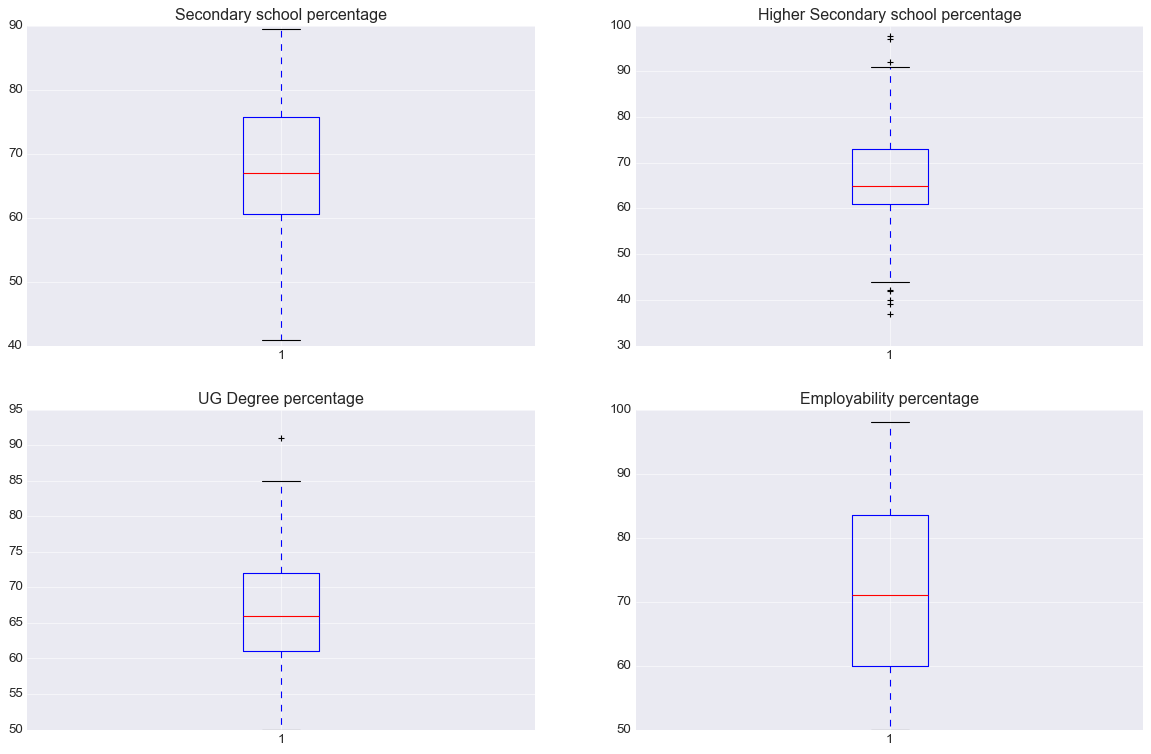

In [94]:
plt.figure(figsize = (18, 11))
plt.style.use('seaborn-v0_8-darkgrid')
ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage')

Using the IQR method we'll filter some outliers in Higher Secondary School Percentage

In [95]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
df_1=df.loc[filter]



# EDA: Checing the influence of Work experience on placement

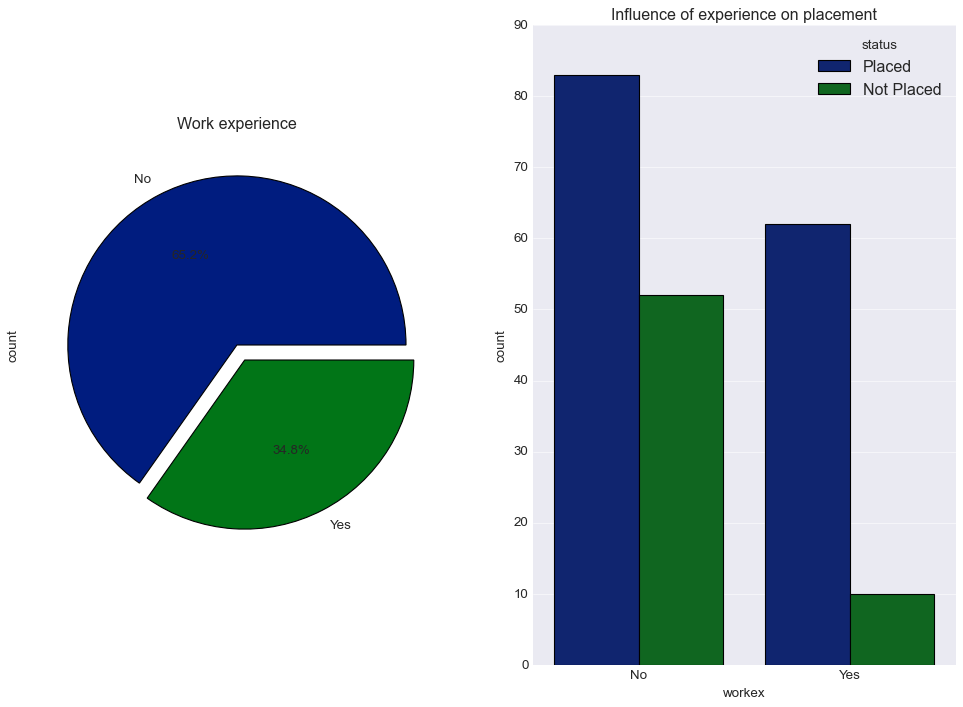

In [96]:
plt.style.use('seaborn-v0_8-dark-palette')
f, ax = plt.subplots(1, 2, figsize=(15, 10))

pie_colors = ['#66c2a5', '#fc8d62']
bar_palette = ['#8da0cb', "#a62f79"]
                                                                        # Plot pie chart for 'workex' value counts
df_1['workex'].value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('Work experience')
                                                                    # Plot countplot for 'workex' vs 'status'
sns.countplot(x='workex', hue='status', data=df_1, ax=ax[1])
ax[1].set_title('Influence of experience on placement')
# Show the plots
plt.show()

- Approximately 65.2% of candidates have no prior work experience.
- Interestingly, candidates without work experience have been hired more frequently than those with experience.

In [97]:
df_1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Creating a copy of Dataset

In [98]:
df1 = df_1.copy()

Drop Salary column for modeling

In [99]:
df1.drop(['salary'],axis = 1,inplace = True)

In [100]:
df1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Encode column values using map function

In [101]:
df1['status']= df1['status'].map({'Placed':1,'Not Placed':0})
df1['workex']= df1['workex'].map({'Yes':1,'No':0})
df1['degree_t']= df1['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
df1['specialisation']= df1['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
df1['hsc_s']= df1['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [102]:
df1.head()  # cheking data


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,0,58.00,0,0,55.0,1,58.80,1
1,0,79.33,78.33,1,77.48,0,1,86.5,0,66.28,1
2,0,65.00,68.00,2,64.00,1,0,75.0,0,57.80,1
3,0,56.00,52.00,1,52.00,0,0,66.0,1,59.43,0
4,0,85.80,73.60,0,73.30,1,0,96.8,0,55.50,1


# Correlation Between Columns

<Axes: >

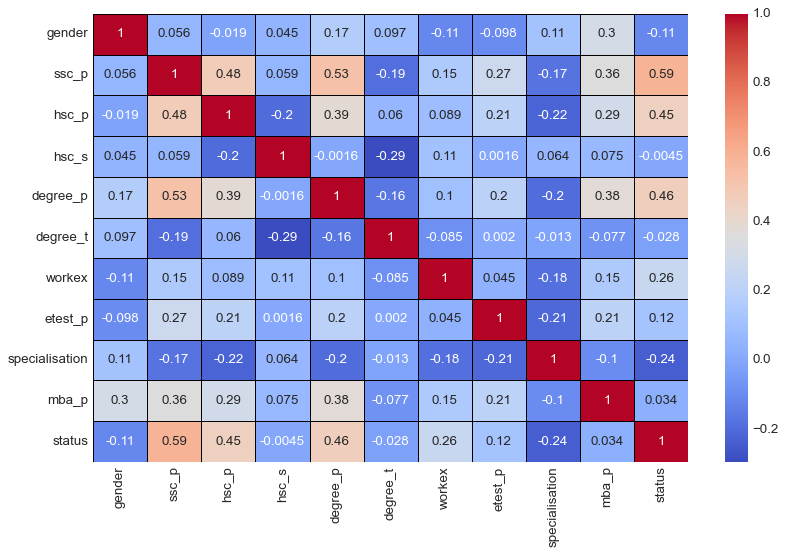

In [103]:
cor=df1.corr()
plt.figure(figsize=(12,7))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

Distribution of data

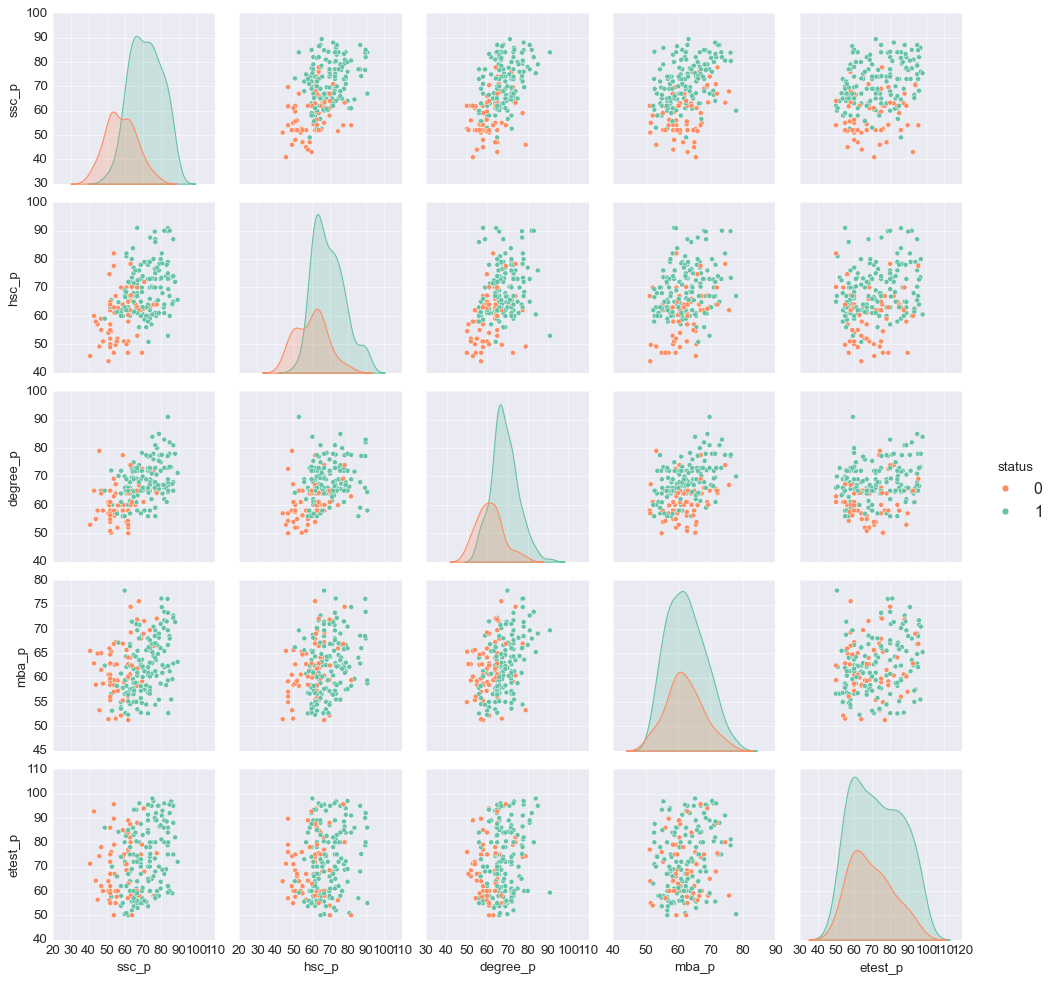

In [104]:
sns.pairplot(
    df1,
    vars=['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p'],
    hue="status",
    palette={0: "#fc8d62", 1: "#66c2a5"}
)

- 1 is placed and 0 is not placed
- Candidates who has high score marks percentage  got placed

# Model Building

## Split the data into train and test sets(70:30)

In [105]:
X = df.drop('status', axis=1)   # example: drop target column
y = df['status']                # target variable

#Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)



## Scaling The Dataset

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)   # fit and predict on test data using log regression model

## Metrices for the Logistic Regression model

Accuracy: 1.0
Confusion Matrix for Logistic Regression:
 [[20  0]
 [ 0 45]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



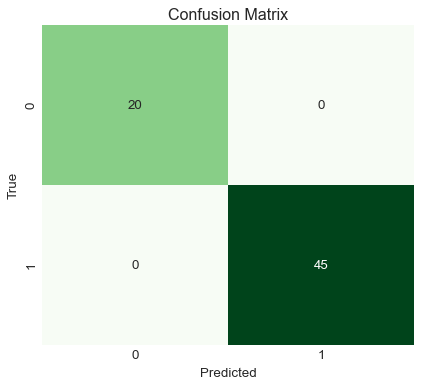

In [107]:
# Encode categorical columns
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns of test set to train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Encode target variable
y_train_encoded = y_train.map({'Placed': 1, 'Not Placed': 0})
y_test_encoded = y_test.map({'Placed': 1, 'Not Placed': 0})

# Fit logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_encoded, y_train_encoded)

# Predict using logistic regression
pred = lr.predict(X_test_encoded)

# Metrics and evaluation
print("Accuracy:", accuracy_score(y_test_encoded, pred))

confusion_matrix_lr = confusion_matrix(y_test_encoded, pred)
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix_lr)

print("Classification Report:\n", classification_report(y_test_encoded, pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Optimizing SVM Model with Grid Search

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [110]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [111]:
grid.fit(X_train_encoded, y_train_encoded) # fitting the model with encoded data

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.700 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

# Voting classifier

In [112]:
from sklearn.ensemble import VotingClassifier

# Define the base estimators
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
svc = SVC(kernel='linear', probability=True, random_state=42)
rt = RandomForestClassifier(n_estimators=100, random_state=42)

# VotingClassifier using encoded data and fitted base estimators
voting_clf = VotingClassifier(
	estimators=[
		('lr', lr),
		('dt', dt),
		('svc', svc),
		('random_forest', rt)
	],
	voting='hard'
)
voting_clf.fit(X_train_encoded, y_train_encoded)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svc',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42))])

In [113]:
y_pred_voting = voting_clf.predict(X_test_encoded) # predict using voting classifier

## Adding Dummy Classifier and LightGBM for Model Comparison

In [114]:
%pip install lightgbm

from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming preprocessing and feature extraction is already done
# Replace X and y with actual feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Dummy Classifier Accuracy:", accuracy_score(y_test, y_pred_dummy))
print(confusion_matrix(y_test, y_pred_dummy))
print(classification_report(y_test, y_pred_dummy))

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Dummy Classifier Accuracy: 0.7209302325581395
[[ 0 12]
 [ 0 31]]
              precision    recall  f1-score   support

  Not Placed       0.00      0.00      0.00        12
      Placed       0.72      1.00      0.84        31

    accuracy                           0.72        43
   macro avg       0.36      0.50      0.42        43
weighted avg       0.52      0.72      0.60        43



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.

In [ ]:
# LightGBM Classifier using encoded data
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_encoded, y_train_encoded)
y_pred_lgbm = lgbm.predict(X_test_encoded)
print("LightGBM Accuracy:", accuracy_score(y_test_encoded, y_pred_lgbm))
print(confusion_matrix(y_test_encoded, y_pred_lgbm))
print(classification_report(y_test_encoded, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 103, number of negative: 47
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686667 -> initscore=0.784581
[LightGBM] [Info] Start training from score 0.784581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L